In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

In [85]:
import numpy as np
import matplotlib.pyplot as pl
from scipy import interpolate
import h5py
import qnm
from numpy import vectorize
from scipy.interpolate import interp2d
from scipy.optimize import minimize
from scipy.optimize import least_squares
import seaborn as sns
pl.rc('figure', figsize=(6.1, 4.5))
pl.rcParams.update({'text.usetex': False,
                     'font.family': 'serif',
                     'font.serif': ['Georgia'],
                     'mathtext.fontset': 'cm',
                     'lines.linewidth': 2.5,
                     'font.size': 14,
                     'xtick.labelsize': 'medium',
                     'ytick.labelsize': 'medium',
                     'xtick.direction': 'in',
                     'ytick.direction': 'in',
                     'axes.labelsize': 'large',
                     'axes.titlesize': 'large',
                     'axes.grid': False,
                     'grid.alpha': 0.73,
                     'lines.markersize': 12,
                     'legend.borderpad': 0.2,
                     'legend.fancybox': True,
                     'legend.fontsize': 12,
                     'legend.framealpha': 0.7,
                     'legend.handletextpad': 0.5,
                     'legend.labelspacing': 0.2,
                     'legend.loc': 'best',
                     'savefig.dpi': 80,
                     'pdf.compression': 9})

In [195]:
name='overtone_'
name=''
t_init='0.0'

In [196]:
finalfinal=np.loadtxt('rest/'+name+'t_'+t_init)

In [197]:
chispace=np.arange(0.1,0.95,0.02)
massspace=np.arange(34,100,0.5)

In [198]:
X, Y = np.meshgrid(massspace,chispace)

In [199]:
mass_old_sampling=np.loadtxt('../m-chi-old-sampling/'+name+'mass_'+t_init)
spin_old_sampling=np.loadtxt('../m-chi-old-sampling/'+name+'spin_'+t_init)

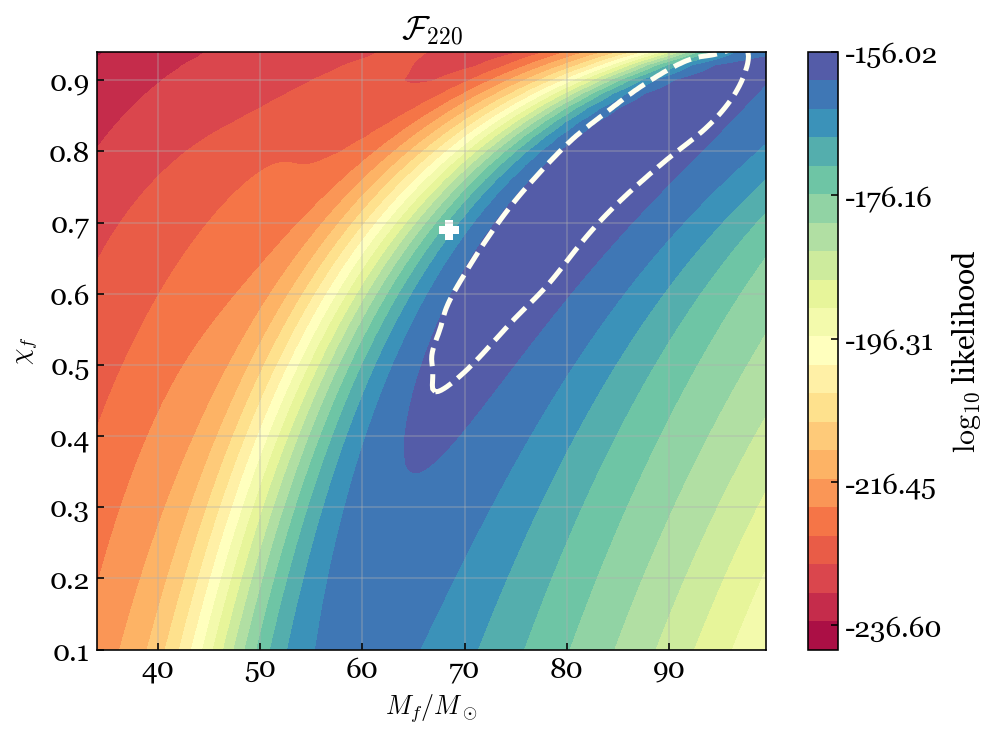

In [200]:
pl.rc('figure', figsize=(7.5, 5.5))
fig, ax = pl.subplots()
contours=ax.contourf(X, Y, finalfinal,20, cmap='Spectral', origin='lower',alpha=1,linestyles='--')
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(0.1))
# ax.scatter(mass_old_sampling,spin_old_sampling,s=1,c='r')
ax.scatter(x=68.5,y=0.69,s=105,marker='+',c='w',linewidths=4,label='IMR')
ax.set_xlim(min(massspace),max(massspace))
ax.set_ylim(min(chispace),max(chispace))
cbar=fig.colorbar(contours,orientation="vertical", pad=0.05,format='%3.2f')

sns.kdeplot(x=mass_old_sampling,y=spin_old_sampling,levels=[0.1],color='ivory',linestyles='--')

cbar.set_label(r'$\log_{10}$ likelihood',fontsize=15)
cbar.set_ticks(np.linspace(np.min(finalfinal),np.max(finalfinal),5))
pl.xlabel(r'$M_f/M_\odot$',fontsize=13)
pl.ylabel(r'$\chi_f$',fontsize=13)
pl.grid(alpha=0.4)

# contoursnew=ax.contour(contours,levels=[-151.],linewidths=2,linestyles='--',colors='pink')

# counterlabel=ax.clabel(contoursnew,contoursnew.levels
#                        , inline=True, fontsize=10,fmt='%3.0f'
#                        ,rightside_up=False,use_clabeltext=True,colors='pink')


# for l in counterlabel:
#     l.set_rotation(0)

# ax.set_title(r'$\mathcal{F}_{220}$')
if name=='overtone_':
    ax.set_title(r'$\mathcal{F}_{221}\mathcal{F}_{220}$')
elif name=='':
    ax.set_title(r'$\mathcal{F}_{220}$')
pl.savefig('vary_filter/'+name+'t'+t_init+'.pdf')

In [201]:
finalfinalnorm=finalfinal.flatten()-np.max(finalfinal.flatten())
mass_max=np.sum((X.flatten())*np.exp(finalfinalnorm)/np.sum(np.exp(finalfinalnorm)))
spin_max=np.sum((Y.flatten())*np.exp(finalfinalnorm)/np.sum(np.exp(finalfinalnorm)))

In [202]:
epsilong=np.sqrt(((mass_max-68.5)/68.5)**2+(spin_max-0.69)**2)
epsilong

0.20089528238594512

In [203]:
0.8e-3/(68.5*2950./2/299792458)

2.3737123978720773

In [204]:
2.3*(68.5*2950./2/299792458)

0.0007751570921774155